## Post-process fractal data

In [1]:
import csv           # Use csv package to read data
import numpy as np
import matplotlib.pyplot as py

In [2]:
N = 4   # Number of boxes is NxN
P = 200 # Number of points in each box

z = np.zeros([N*P,N*P]) # Initialise full storage

# Coordinate of bottom left corner of the region of complex plane:
x0 = -2 
y0 = -1.5
S = 3     # Size of the full box in the complex plane.

In [3]:
fileprefix = "./data/fractal_data_"
filesuffix = ".csv"

In [4]:
# Loop over all the data files:
for n in range(N**2):
    
  # Read in the .csv data file: 
  filename = fileprefix + str(n+1) + filesuffix
  file = open(filename)
  csvreader = csv.reader(file)
  rows = []
  for row in csvreader:
    rows.append(row)
  file.close()

  # Extract the data:
  data = np.zeros(len(rows))
  for i in range(len(rows)):
    data[i] = rows[i][2]
  
  
  # Indices for inserting data:
  nx = (n+1) % N 
  ny = int(np.floor(n/N)) 
  
  # Insert into the full array:
  z[(nx*P):((nx+1)*P),(ny*P):((ny+1)*P)] = np.reshape(data,[P,P])

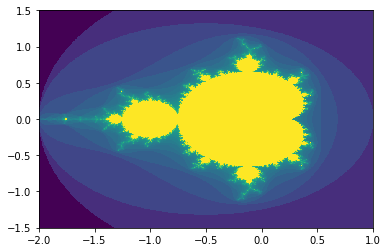

In [5]:
z = np.transpose(z) #Flip the matrix around.   
# Plot 2D image:  
py.pcolormesh(np.linspace(x0,x0+S,N*P),np.linspace(y0,y0+S,N*P),np.log10(z),shading='auto')